<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/Ri-on/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install asyncpraw yfinance==0.2.54

In [20]:
#Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Yahoo Finance
import yfinance as yf

# Firm Selection

In [21]:
#Select the frim for the prediction
firm = "AAPL"

Top 10 Tech Companies in U.S.
- Apple Inc. – $3.69 trillion (AAPL)

- Nvidia Corporation – $3.43 trillion (NVDA)

- Microsoft Corporation – $3.09 trillion (MSFT)

- Amazon.com Inc. – $2.36 trillion (AMZN)

- Alphabet Inc. – $2.26 trillion (GOOGL)

- Meta Platforms Inc. – $1.76 trillion (META)

- Tesla Inc. – $1.14 trillion (TSLA)

- Broadcom Inc. – $1.06 trillion (AVGO)

- Oracle Corporation – $518.32 billion (ORCL)

- Advanced Micro Devices (AMD) – $450 billion (AMD)

In [22]:
# Get the firm's full name
def get_firm_name(ticker):
    stock = yf.Ticker(ticker)
    return stock.info["longName"]  # return Full name

firm_name = get_firm_name(firm)
print(firm_name)  # Full name

Apple Inc.


In [23]:
#Get the firm name that is commonly used
import re

firm_name = re.sub(r'[^A-Za-z0-9 ]+', '', firm_name).split(' ')[0]
print(firm_name)

Apple


# Data Collection

### Stock Price

In [24]:
# Fetch data for a single stock
ticker = firm
stock = yf.Ticker(ticker)

# Get historical data
data = stock.history(period="5y") #I just set the period 5 years since yahoo finance api offers free microeconomic data about past 5 years

# Convert to Dataframe
df_stock = pd.DataFrame(data)

# Display
df_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-21 00:00:00-05:00,77.322389,77.766496,75.351836,75.970665,129554000,0.0,0.0
2020-02-24 00:00:00-05:00,72.138769,73.818104,70.190057,72.362030,222195200,0.0,0.0
2020-02-25 00:00:00-05:00,73.034250,73.417680,69.437745,69.910965,230673600,0.0,0.0
2020-02-26 00:00:00-05:00,69.534825,72.289234,69.527545,71.020020,198054800,0.0,0.0
2020-02-27 00:00:00-05:00,68.217067,69.406192,66.241656,66.377556,320605600,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-14 00:00:00-05:00,241.250000,245.550003,240.990005,244.600006,40896200,0.0,0.0
2025-02-18 00:00:00-05:00,244.149994,245.179993,241.839996,244.470001,48822500,0.0,0.0
2025-02-19 00:00:00-05:00,244.660004,246.009995,243.160004,244.869995,32204200,0.0,0.0


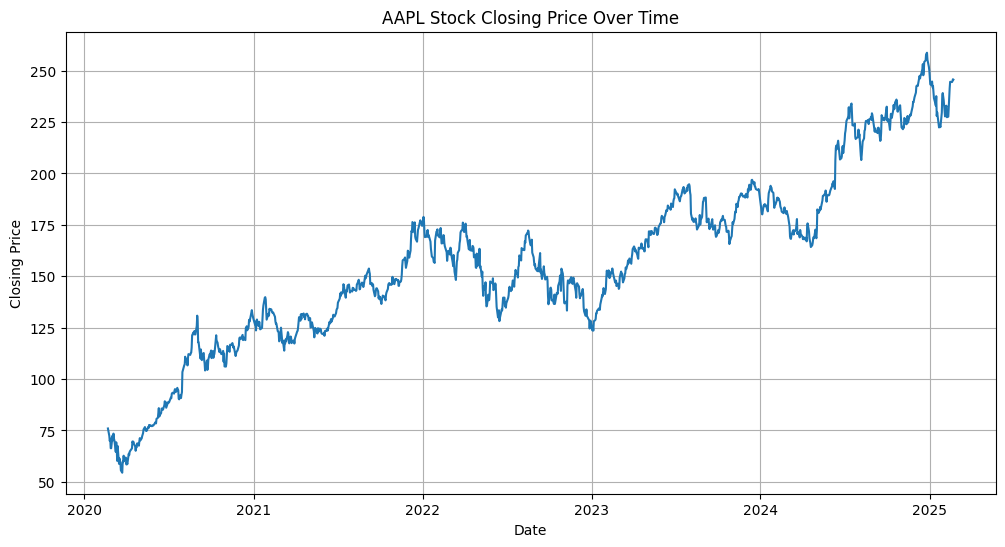

In [25]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{firm} Stock Closing Price Over Time')
plt.grid(True)
plt.show()


### Macroeconomic Indicators

In [26]:
!pip install fredapi

In [27]:
from fredapi import Fred

# API key is from https://fred.stlouisfed.org
api_key = "d6ed01a1d424d730c0a92819f41f4c79"
fred = Fred(api_key=api_key)

# Macroeconomic Indicators and Their FRED Codes
# Indicators can be added or revised
indicators = {
    "GDP (Billions USD)": "GDP",
    "Unemployment Rate (%)": "UNRATE",
    "Producer Price Index (PPI)": "PPIACO",
    "Retail Sales (Millions USD)": "RSAFS",
    "Industrial Production Index": "INDPRO",
    "Housing Starts (Thousands)": "HOUST",
    "Personal Consumption Expenditures (PCE)": "PCE",
    "Trade Balance (Billions USD)": "BOPGSTB",
    "M2 Money Supply (Billions USD)": "M2",
    "Consumer Confidence Index": "UMCSENT",
}

# Fetch Data for Each Indicator
data = {}
for name, code in indicators.items():
    data[name] = fred.get_series(code)

# Convert to DataFrame
df_macro = pd.DataFrame(data)

# Display the data
df_macro


,GDP (Billions USD),Unemployment Rate (%),Producer Price Index (PPI),Retail Sales (Millions USD),Industrial Production Index,Housing Starts (Thousands),Personal Consumption Expenditures (PCE),Trade Balance (Billions USD),M2 Money Supply (Billions USD),Consumer Confidence Index
1913-01-01,NaN,NaN,12.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-02-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-03-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-04-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-05-01,NaN,NaN,11.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-09-01,NaN,4.1,252.682,716388.0,102.5873,1355.0,20044.1,-84333.0,NaN,70.1
2024-10-01,29700.58,4.1,253.081,720393.0,102.1219,1344.0,20134.5,-74153.0,NaN,70.5
2024-11-01,NaN,4.2,253.229,725079.0,101.9736,1305.0,20253.6,-78940.0,NaN,71.8
2024-12-01,NaN,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,NaN,74.0


### Microeconomic Indicators

In [28]:
# Fetch company data
stock = yf.Ticker(firm)

# Fetch Financial Statements
financials = stock.financials.T  # Income Statement (Revenue, Profit, Margins)
balance_sheet = stock.balance_sheet.T  # Assets, Liabilities, Equity
cash_flow = stock.cashflow.T  # Cash from Operations, Investments, Financing

# Convert to DataFrame
df_financials = pd.DataFrame(financials)
df_balance_sheet = pd.DataFrame(balance_sheet)
df_cash_flow = pd.DataFrame(cash_flow)

df_micro = pd.concat([df_financials, df_balance_sheet, df_cash_flow], axis=1)
df_micro

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2024-09-30,0.0,0.241,134661000000.0,93736000000.0,11445000000.0,210352000000.0,134661000000.0,123216000000.0,NaN,NaN,...,-1046000000.0,-5144000000.0,-3788000000.0,-2266000000.0,11688000000.0,NaN,NaN,11445000000.0,11445000000.0,93736000000.0
2023-09-30,0.0,0.147,125820000000.0,96995000000.0,11519000000.0,214137000000.0,125820000000.0,114301000000.0,-183000000.0,3933000000.0,...,-1618000000.0,-417000000.0,-1688000000.0,-2227000000.0,10833000000.0,NaN,NaN,11519000000.0,11519000000.0,96995000000.0
2022-09-30,0.0,0.162,130541000000.0,99803000000.0,11104000000.0,223546000000.0,130541000000.0,119437000000.0,-106000000.0,2931000000.0,...,1484000000.0,-9343000000.0,-1823000000.0,1006000000.0,9038000000.0,895000000.0,895000000.0,11104000000.0,11104000000.0,99803000000.0
2021-09-30,0.0,0.133,123136000000.0,94680000000.0,11284000000.0,212981000000.0,123136000000.0,111852000000.0,198000000.0,2645000000.0,...,-2642000000.0,-14028000000.0,-10125000000.0,-4921000000.0,7906000000.0,-4774000000.0,-4774000000.0,11284000000.0,11284000000.0,94680000000.0
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,890000000.0,2873000000.0,...,NaN,NaN,NaN,NaN,NaN,-215000000.0,-215000000.0,NaN,NaN,NaN


In [29]:
df_micro.columns.tolist() #We can choose the moste relevent indicators

['Tax Effect Of Unusual Items',
 'Tax Rate For Calcs',
 'Normalized EBITDA',
 'Net Income From Continuing Operation Net Minority Interest',
 'Reconciled Depreciation',
 'Reconciled Cost Of Revenue',
 'EBITDA',
 'EBIT',
 'Net Interest Income',
 'Interest Expense',
 'Interest Income',
 'Normalized Income',
 'Net Income From Continuing And Discontinued Operation',
 'Total Expenses',
 'Total Operating Income As Reported',
 'Diluted Average Shares',
 'Basic Average Shares',
 'Diluted EPS',
 'Basic EPS',
 'Diluted NI Availto Com Stockholders',
 'Net Income Common Stockholders',
 'Net Income',
 'Net Income Including Noncontrolling Interests',
 'Net Income Continuous Operations',
 'Tax Provision',
 'Pretax Income',
 'Other Income Expense',
 'Other Non Operating Income Expenses',
 'Net Non Operating Interest Income Expense',
 'Interest Expense Non Operating',
 'Interest Income Non Operating',
 'Operating Income',
 'Operating Expense',
 'Research And Development',
 'Selling General And Administr

### Sentiment Analysis

##### yhfinance web scrapping

In [30]:
#Yahoo Finance web scrapping initialization
import requests
from bs4 import BeautifulSoup

url = f"https://finance.yahoo.com/quote/{firm}/news"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# print(soup.prettify())

In [31]:
# Find Articles Title
articles_title = soup.find_all("h3", class_="clamp")

# Find Posted times
articles_time = soup.find_all(class_="publishing yf-1weyqlp")

# Find Articles Summaries
articles_summary = soup.find_all("p", class_="yf-82qtw3")

# Make list for titles
article_title_list = []
for article_title in articles_title:
    article_title_list.append(article_title.text)

# Make list for times
article_time_list = []
for article_time in articles_time:
    article_time_list.append(article_time.text.split("•")[1].strip())

# Make list for summaries
article_summary_list = []
for article_summary in articles_summary:
    article_summary_list.append(article_summary.text)

#Dataframe
yh_article_titles_df = pd.DataFrame({"Time": article_time_list, "Title": article_title_list, "Summary": article_summary_list})

yh_article_titles_df

,Time,Title,Summary
0,2 hours ago,The Vision Pro is getting Apple Intelligence i...,Apple Intelligence is heading to the Vision Pr...
1,4 hours ago,Warren Buffett's top 5 stock holdings,"Berkshire Hathaway (BRK-B, BRK-A) CEO and lege..."
2,21 hours ago,Big Tech leaning further into humanoid robots:...,"Big Tech companies like Tesla (TSLA), Amazon (..."
3,23 hours ago,Alibaba stock surges as Chinese tech giant tou...,Alibaba stock surged Thursday after the compan...
4,48 minutes ago,"Magnificent Seven Stocks: Amazon, Nvidia, Tesl...","Dubbed the Magnificent Seven stocks, Apple, Mi..."
5,1 hour ago,iPhone 16e – A testbed for Apple’s C1 cellular...,The $599 iPhone 16e comes with Apple’s own cel...
6,2 hours ago,Apple Pulls Advanced Data Protection Service i...,The service will no longer be available to new...
7,2 hours ago,Government has made UK user data ‘less secure’...,Cybersecurity experts say the tech giant’s dec...
8,2 hours ago,Trump Says Cook Shifting Apple Manufacturing F...,(Bloomberg) -- President Donald Trump told a g...
9,3 hours ago,Apple Pulls Cloud Encryption Feature in UK Ove...,Apple disables its end-to-end encryption featu...


##### Reddit web scrapping

In [32]:
import openai

# openai api
client = openai.OpenAI(api_key="")

# request
response = client.chat.completions.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": f"""Give me the four most profitable product
        and representative leader about the {firm_name} in the us as a python list.
          Do not include any other words or sentences. Just python list like [a, b, c, d, e] and
          add {firm_name} before the products and representative. Do not include special characters"""}
    ],
    max_tokens=100
)

print(response.choices[0].message.content)

["Apple iPhone", "Apple Macbook Pro", "Apple iPad", "Apple Watch", "Apple Tim Cook"]


In [33]:
import ast

# String to list
keywords = ast.literal_eval(response.choices[0].message.content)
# Add frim name to the list + cleaning
keywords.append(f'{firm_name}')
keywords = [re.sub(r"[^\w\s]", '', keyword.replace('_', ' ')).replace('-', ' ') for keyword in keywords]

print(keywords)

['Apple iPhone', 'Apple Macbook Pro', 'Apple iPad', 'Apple Watch', 'Apple Tim Cook', 'Apple']


In [35]:
from datetime import datetime
import asyncpraw #Library for Reddit API
import asyncio # for async environment
import nest_asyncio # Preventing async loop error
import re


nest_asyncio.apply()  # Prevent async loop error

# API
async def fetch_reddit(firm_name):
    reddit = asyncpraw.Reddit(
        client_id="ardOQiL60Y2K7KF0V_WMGA",
        client_secret="oyNdfuaDlVeSwV7qmgSRP5bFcYru-Q",
        user_agent="my_reddit_scraper"
    )

    subreddit = await reddit.subreddit("worldnews")  # Searching from r/worldnews

    data = []

    # keyword search
    async for post in subreddit.search(firm_name, limit=250, sort='new', time_filter='all'):
        data.append({
            "Title": post.title,
            "Score": post.score,
            "Date Posted": datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d'),
        })

    await reddit.close()

    # DataFrame
    df = pd.DataFrame(data)
    return df

# df_reddt = await fetch_reddit(firm_name) #For Single Keyword
# df_reddt

# loop for keywords
dataframes = []
for keyword in keywords:
    df = await fetch_reddit(keyword)
    dataframes.append(df)
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

,Title,Score,Date Posted
0,Apple Warns UK iPhone Owners It Will Remove En...,49,2025-02-21
1,Apple Faces EU Warning to Open Up iPhone Opera...,6139,2024-09-19
2,Random Apple Pay Charges Affecting iPhone User...,45,2024-06-28
3,Apple supplier Foxconn rejects married women f...,89,2024-06-26
4,Apple found in breach of EU competition rules ...,424,2024-06-24
...,...,...,...
611,Hong Kong court denies bail to Apple Daily sta...,39,2021-07-22
612,Four Apple Daily staff due in Hong Kong court ...,25,2021-07-22
613,Hong Kong police arrest former Apple Daily edi...,21,2021-07-21
614,Hong Kong police arrest former senior editor o...,2150,2021-07-21


##### Data Merging (Sentiment Analysis)

##### Text Quantification

### Data Merging

# EDA

# Feature Engineering

# Modeling

# Evaluation